# Synthetic Data Generation (Vertex Gemini)

## Myntra Product Catalog Data Pipeline

This notebook uses the Myntra product catalog dataset from Kaggle as a foundation for generating synthetic product data. We'll leverage Gemini to expand product descriptions, create realistic titles, and craft image generation prompts for each synthetic product.

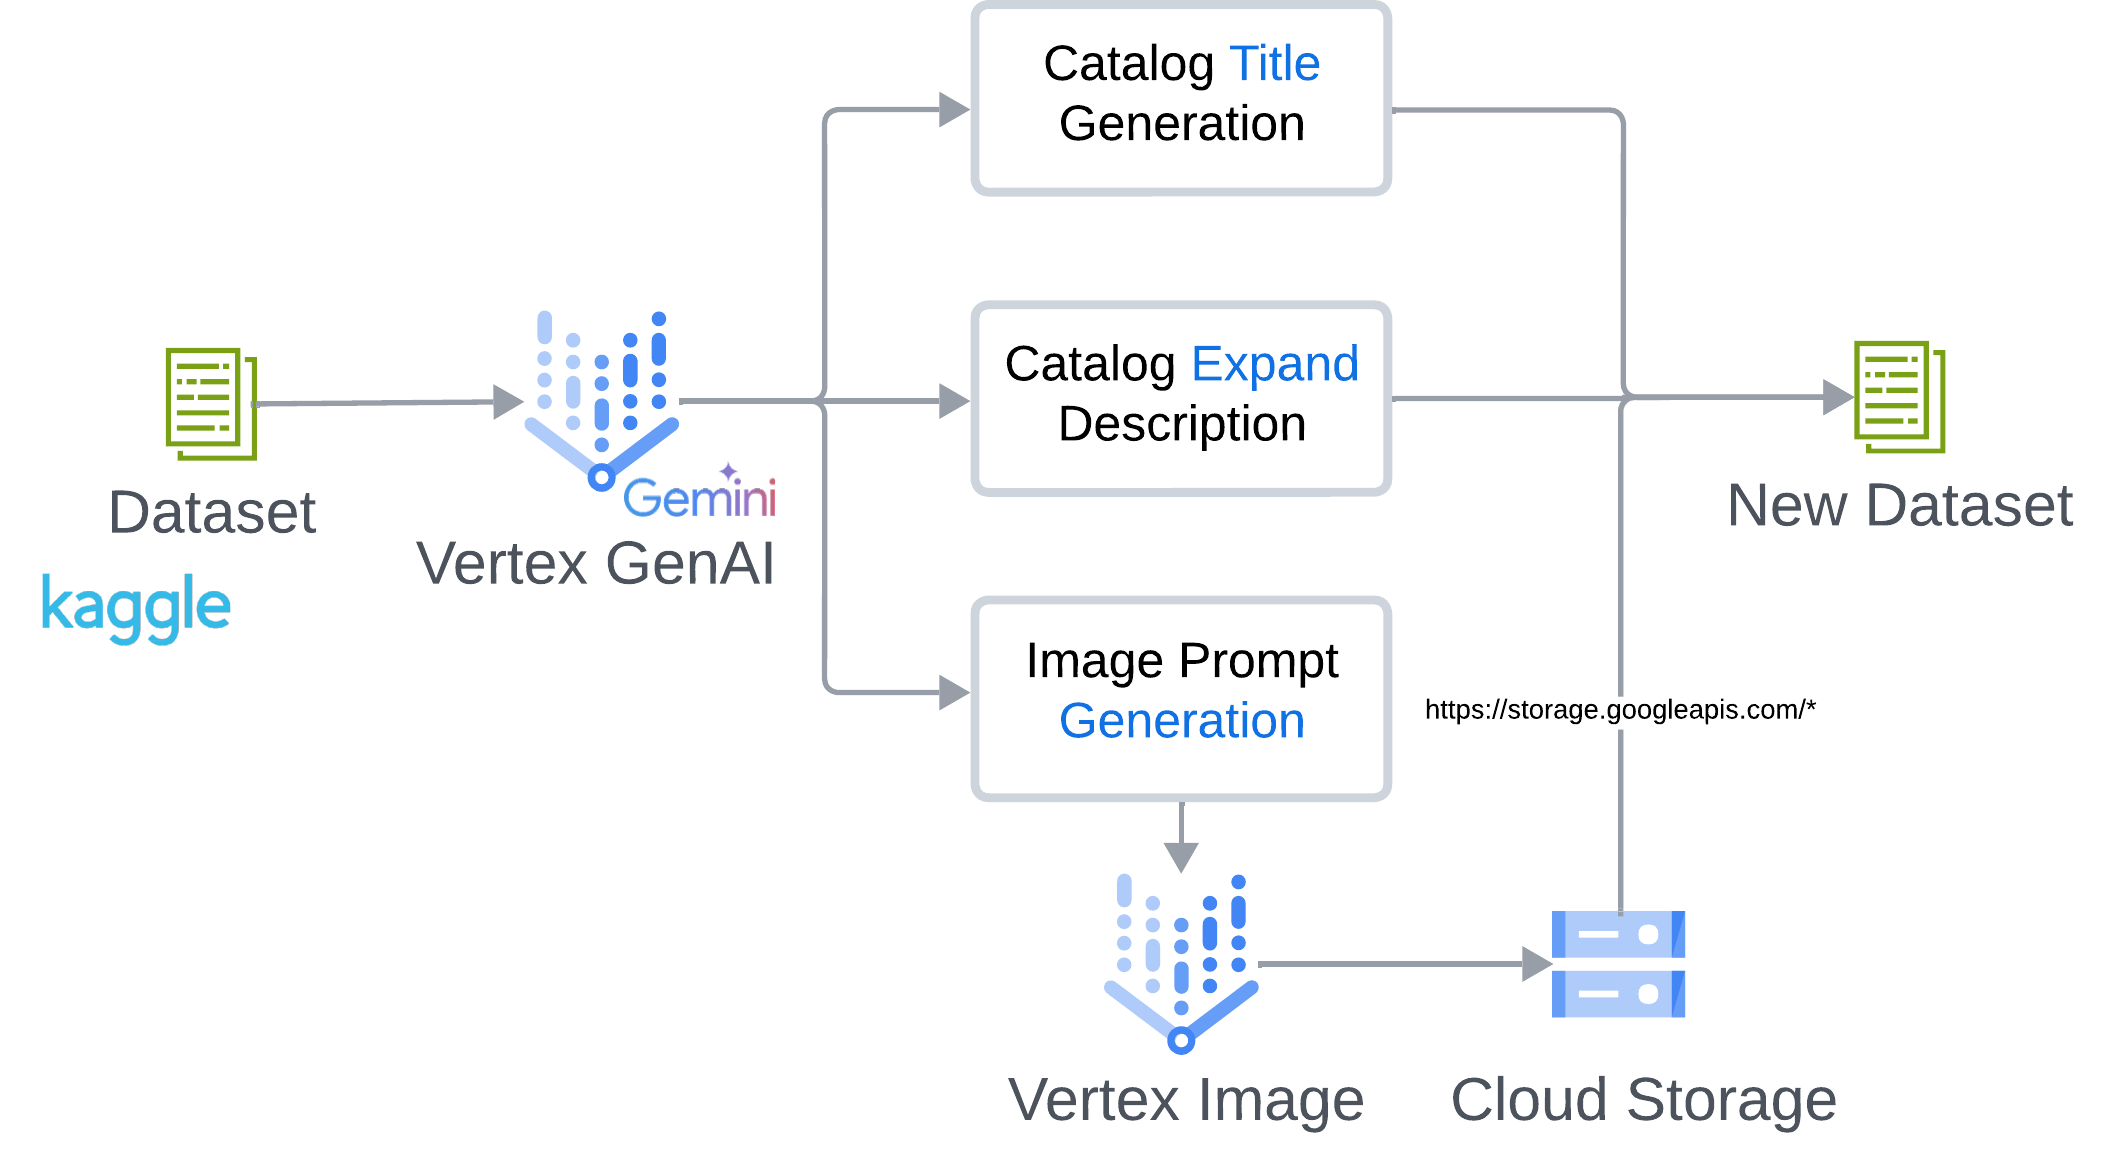

### Libraries

In [ ]:
import vertexai
import pandas as pd
from google import genai
from google.genai import types
from google.cloud import storage
from vertexai.preview.vision_models import ImageGenerationModel
from vertexai.vision_models import Image, MultiModalEmbeddingModel
from vertexai.language_models import TextEmbeddingInput, TextEmbeddingModel

### Variables

In [ ]:
project_id = "vtxdemos"
region = "us-central1"
dataset_uri_suffix = "gs://vtxdemos-datasets-public/retail/myntra_products_catalog.csv"

# AI/ML
text_model_id = "gemini-1.5-flash-002"
#Imagen
generation_model = ImageGenerationModel.from_pretrained("imagen-3.0-generate-001")

In [ ]:
# Initialization
vertexai.init(project=project_id, location="us-central1")

### Data Loading

In [ ]:
# Loading Dataset

df = pd.read_csv(dataset_uri_suffix)
df.head()

,Unnamed: 0.1,Unnamed: 0,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,prompt,image_gcs_uri
0,0,0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,"A medium trolley bag, black and grey print, DK...",gs://vtxdemos-datasets-public/retail/images/17...
1,1,1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,A beige calf-length kurta with a V-neck and 3/...,NaN
2,2,2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,A pair of women's SPYKAR brand pink Alexa supe...,gs://vtxdemos-datasets-public/retail/images/17...
3,3,3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,A man wearing a Raymond brand blue self-design...,NaN
4,4,4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,A Parx men's brown and off-white slim fit casu...,gs://vtxdemos-datasets-public/retail/images/17...


### Helper Functions

In [ ]:
# Helpers Functions

# Prompt Generation for Imagen
client = genai.Client(
    vertexai=True,
    project=project_id,
    location=region
)

def expand_description(description: str):
  """
  this function will expand the description of the product.
  """

  prompt = types.Part.from_text(text=f"""
  Expand (become larger) the following Description.

  Rules:
  - Be creative and augment what you are being asked.

  Description:
  {description}

  Output (string format):
  """)

  contents = [prompt]
  try:
    response = client.models.generate_content(
        model=text_model_id,
        contents=contents
    )
    print("Job Done")
    return response.text
  except Exception as e:
    print(e)
    return None

def generate_title(description: str):
  """
  this function will generate a title for the product.
  """
  prompt = types.Part.from_text(text=f"""
  You are a a very creative retail developer expert, by following best ux/ui practices, create a title for the following Description.

  Rules:
  - Title needs to fit in the product image presentation, so keep it as short as possible.
  - Do not give options.
  - Your output must be a short title only (no explanations).

  Description:
  {description}

  Output (string format):
  """)

  contents = [prompt]
  try:
    response = client.models.generate_content(
        model=text_model_id,
        contents=contents
    )
    print("Job Done")
    return response.text
  except Exception as e:
    print(e)
    return None

def generate_prompt(context: str):
  """
  this function will generate a prompt for vertex image generation.
  """
  prompt_template = types.Part.from_text(text=f"""
  Your mission is to create a very impactful and atractive images for the UX/UI of a retail website.

  From the following <content> **create a CREATIVE prompt** with all the details to generate an image using Google Vision (Imagen).

  <content>
  {context}

  Output (string format):
  """)

  model = text_model_id
  contents = [
    types.Content(
      role="user",
      parts=[
        prompt_template
      ]
    )
  ]

  try:
    response = client.models.generate_content(
        model=model,
        contents=contents
    )
  except Exception as e:
    print(e)
    return None
  return response.text

def generate_image(prompt: str):
  """
  this function will generate an image using the prompt generated.
  """
  try:
    image = generation_model.generate_images(
        prompt=prompt,
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="block_few",
        person_generation="dont_allow",
        output_gcs_uri="/".join(dataset_uri_suffix.split("/")[:-1])+"/images"
    )
    if len(image.images) == 0:
      return None
    else:
      return image.images[0]._gcs_uri
  except Exception as e:
    print(e)
    print(re)
    return None

### Using Gemini to Create a Title, Expand Deescription and Create Prompt for Image Generation

In [ ]:
import random

df_200 = df.sample(n=200, random_state=42).copy()

The original description from this dataset is very short, let's amplify it for demo purposes.

*Data augmentation's effectiveness is dependent on the specific dataset being used.  Different datasets benefit from different augmentation techniques.*

In [ ]:
# Expand Description
df_200["gemini_description"] = df_200.apply(lambda row: expand_description(row["Description"]), axis=1)

Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
J

In [ ]:
# Generate Title
df_200["title"] = df_200.apply(lambda row: generate_title(row["gemini_description"]), axis=1)

Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
Job Done
J

<ipython-input-502-6493b561e240>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_200["title"] = df_200.apply(lambda row: generate_title(row["gemini_description"]), axis=1)


In [ ]:
# Generate prompt for Vision (Image Generation)
df_200["prompt"]=df_200.apply(lambda row: generate_prompt(
    f"""
    description: {row['Description']},
    expanded_description: {row['gemini_description']},
    product_name: {row['ProductName']},
    brand: {row['ProductBrand']},
    gender: {row['Gender']},
    primary_color: {row['PrimaryColor']},
    """
    ), axis=1)

### Dataset Backup [Optional]



> Storing the dataset locally as pickel file.



In [ ]:
dataset_backup="myntra_products_catalog_backup.pkl"
df_200.to_pickle(dataset_backup)
df_200 = pd.read_pickle(dataset_backup)

### Image Generation

In [ ]:
# Generating Image

df_200["image_gcs_uri"] = df_200.apply(lambda row: generate_image(row["prompt"]), axis=1)

429 Unable to submit request because the service is temporarily out of capacity. Try again later.
[ 0.023932    0.0150311   0.02099021  0.02247434  0.02043884  0.08515658
  0.08775128  0.09384392  0.094596    0.01710833  0.07449116  0.00842569
  0.01130726  0.09631364  0.02091415  0.08433397  0.03055599  0.02138096
  0.03170545  0.01399569  0.03822116  0.01046809  0.02157699  0.02129184
  0.02470336  0.00671711  0.02237279 -0.00012433  0.00327214  0.0051965
  0.01820383  0.02203557  0.00223749  0.02357829  0.01211739  0.03034538
  0.0276923   0.01920671  0.02446793  0.02088717  0.01027114  0.01943957
  0.03206974  0.03328841  0.00885106  0.02740765  0.02867472  0.01921513
  0.0100582   0.03061356  0.01751339  0.01994246  0.01634478  0.0221157
  0.02885002  0.02271789  0.02169165  0.02228386  0.02774562  0.02475301
  0.02320624  0.01013424  0.02157951  0.01745058  0.03122343  0.02110639
  0.0258779   0.02745842  0.02623843  0.02184383  0.02915952  0.01906202
  0.02079688  0.01878916  0.

#### Duplicates Drop

In [ ]:
mask = df_200.notna().all(axis=1)
df_200.loc[mask, "image_public_uri"] = df_200.loc[mask].apply(lambda row: "https://storage.googleapis.com/" + "/".join(row["image_gcs_uri"].split("/")[2:]), axis=1)

### Dataset Backup [Optional]

> Storing a second checkpoint locally as pickel file.

In [ ]:
dataset_backup = "dataset_backup_2.pkl"
df_200.to_pickle(dataset_backup)
df_200 = pd.read_pickle(dataset_backup)

In [ ]:
# Remove the unamed columns from the dataset

df_200 = df_200.loc[:, ~df_200.columns.str.contains('^Unnamed')]
df_200

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,prompt,image_gcs_uri,gemini_description,title,image_public_uri
95,10012783,SEJ by Nisha Gupta Set of 6 Pink Printed Table...,SEJ by Nisha Gupta,Unisex,899,4,Set content: 6 table mats Shape: Rectangle Col...,Pink,```\nA captivating photorealistic image of a s...,gs://vtxdemos-datasets-public/retail/images/17...,Indulge your senses with this vibrant set of s...,"""Pink Fiesta Mats""\n",https://storage.googleapis.com/vtxdemos-datase...
15,1000795,Being Human Clothing Navy Printed Casual Slim ...,Being Human,Men,1079,6,"Navy blue printed casual shirt, has a spread c...",Navy,"```\nCreate a photorealistic image of a ""Being...",gs://vtxdemos-datasets-public/retail/images/17...,This isn't just a navy blue printed casual shi...,"""Twilight Navy Shirt""\n",https://storage.googleapis.com/vtxdemos-datase...
30,10013041,Sera Women Blue Printed Kurta with Palazzos,Sera,Women,1437,5,Blue printed kurta with palazzos Blue A-line c...,Blue,```\nA captivating photorealistic image of the...,None,"""Imagine a breathtaking ensemble: a vibrant bl...","""Sapphire Blue Kurta & Palazzo Set""\n",NaN
158,10017747,Parx Men Maroon Slim Fit Printed Casual Shirt,Parx,Men,717,5,"Maroon printed casual shirt, has a spread coll...",Maroon,```\nA photorealistic image of a Parx Men's Ma...,gs://vtxdemos-datasets-public/retail/images/17...,"""This isn't just a shirt; it's a statement. I...","""Maroon Statement Shirt""\n",https://storage.googleapis.com/vtxdemos-datase...
128,10005937,Difference of Opinion Men Olive Green Printed ...,Difference of Opinion,Men,499,5,T-shirt,Green,```\nA photorealistic image of a Difference of...,gs://vtxdemos-datasets-public/retail/images/17...,"A classic crew-neck T-shirt, crafted from luxu...","""Effortless Style. Endless Possibilities.""\n",https://storage.googleapis.com/vtxdemos-datase...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,10012713,MIAH Decor Set Of 5 Handcrafted Ceramic Kulladhs,MIAH Decor,Unisex,865,4,Set Of 5 Ceramic Kulladhs Pattern: PrintedFini...,NaN,"```\nA stunning, high-resolution photorealisti...",gs://vtxdemos-datasets-public/retail/images/17...,Indulge in the rich tradition and vibrant arti...,Handcrafted Indian Kulladhs\n,NaN
14,10017749,Parx Men Red Slim Fit Checked Casual Shirt,Parx,Men,752,5,"Red checked casual shirt, has a spread collar,...",Red,```\nA photorealistic image of a Parx Men Red ...,gs://vtxdemos-datasets-public/retail/images/17...,"The shirt is a vibrant, crimson red, punctuate...",Crimson Check Shirt\n,https://storage.googleapis.com/vtxdemos-datase...
92,10007683,Roadster Women Black Textured Open Toe Flats,Roadster,Women,1699,6,"A pair of black open-toed flats, has regular s...",Red,"```\nA captivating, lifestyle-oriented image s...",None,Step into effortless style and comfort with th...,"""Effortless Chic Flats""\n",NaN
179,10016679,Raymond Men Green Printed Polo Collar T-shirt,Raymond,Men,944,5,"Green printed T-shirt, has a polo collar, shor...",Green,```\nA photorealistic image of a Raymond Men's...,gs://vtxdemos-datasets-public/retail/images/17...,"""Imagine a vibrant, emerald green t-shirt, the...","""Emerald Meadow Polo""\n",https://storage.googleapis.com/vtxdemos-datase...


In [ ]:
# Dropping nulls

df_clean = df_200.dropna()
df_clean

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,prompt,image_gcs_uri,gemini_description,title,image_public_uri
95,10012783,SEJ by Nisha Gupta Set of 6 Pink Printed Table...,SEJ by Nisha Gupta,Unisex,899,4,Set content: 6 table mats Shape: Rectangle Col...,Pink,```\nA captivating photorealistic image of a s...,gs://vtxdemos-datasets-public/retail/images/17...,Indulge your senses with this vibrant set of s...,Pink Fiesta Mats\n,https://storage.googleapis.com/vtxdemos-datase...
15,1000795,Being Human Clothing Navy Printed Casual Slim ...,Being Human,Men,1079,6,"Navy blue printed casual shirt, has a spread c...",Navy,"```\nCreate a photorealistic image of a ""Being...",gs://vtxdemos-datasets-public/retail/images/17...,This isn't just a navy blue printed casual shi...,Twilight Navy Shirt\n,https://storage.googleapis.com/vtxdemos-datase...
158,10017747,Parx Men Maroon Slim Fit Printed Casual Shirt,Parx,Men,717,5,"Maroon printed casual shirt, has a spread coll...",Maroon,```\nA photorealistic image of a Parx Men's Ma...,gs://vtxdemos-datasets-public/retail/images/17...,"""This isn't just a shirt; it's a statement. I...",Artisan Cotton Shirt\n,https://storage.googleapis.com/vtxdemos-datase...
128,10005937,Difference of Opinion Men Olive Green Printed ...,Difference of Opinion,Men,499,5,T-shirt,Green,```\nA photorealistic image of a Difference of...,gs://vtxdemos-datasets-public/retail/images/17...,"A classic crew-neck T-shirt, crafted from luxu...",The Everyday Tee\n,https://storage.googleapis.com/vtxdemos-datase...
69,10012761,Peter England Men Black Briefs PIWBK9146012,Peter England,Men,266,5,"A pair of black briefs, has an elasticated wai...",Black,```\nA photorealistic image of Peter England M...,gs://vtxdemos-datasets-public/retail/images/17...,These aren't just black briefs; they're a meti...,Luxe Black Briefs\n,https://storage.googleapis.com/vtxdemos-datase...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,10017481,Soie Green Self Design Underwired Non Padded E...,Soie,Women,728,5,Green full-coverage Everyday bra Non Padded an...,Green,"```\nCreate a stunning, high-resolution image ...",gs://vtxdemos-datasets-public/retail/images/17...,Indulge in the luxurious comfort of our Green ...,Green Everyday Bra\n,https://storage.googleapis.com/vtxdemos-datase...
71,10003179,Gini and Jony Girls Blue Solid Jacket,Gini and Jony,Girls,1189,3,"Blue solid jacket, has a spread collar, 4 pock...",Blue,"```\nA captivating, high-resolution image of t...",gs://vtxdemos-datasets-public/retail/images/17...,"The jacket is a deep sapphire blue, a rich, al...",Sapphire Twill Jacket\n,https://storage.googleapis.com/vtxdemos-datase...
14,10017749,Parx Men Red Slim Fit Checked Casual Shirt,Parx,Men,752,5,"Red checked casual shirt, has a spread collar,...",Red,```\nA photorealistic image of a Parx Men Red ...,gs://vtxdemos-datasets-public/retail/images/17...,"The shirt is a vibrant, crimson red, punctuate...",Crimson Check Shirt\n,https://storage.googleapis.com/vtxdemos-datase...
179,10016679,Raymond Men Green Printed Polo Collar T-shirt,Raymond,Men,944,5,"Green printed T-shirt, has a polo collar, shor...",Green,```\nA photorealistic image of a Raymond Men's...,gs://vtxdemos-datasets-public/retail/images/17...,"""Imagine a vibrant, emerald green t-shirt, the...",Emerald Meadow Polo\n,https://storage.googleapis.com/vtxdemos-datase...


### Building Embeddings

#### Definitions

In [ ]:
emb_model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding@001")
text_emb_model = TextEmbeddingModel.from_pretrained("text-embedding-005")

#### Helper Functions for Getting Embeddings

In [ ]:
def get_mm_embeddings(thing: str):
  """
  This function generates embeddings from Images
  """
  if "gs://" in thing:
    print("processing image embeddings...")
    image = Image.load_from_file(thing)
    image_embeddings = emb_model.get_embeddings(image=image)
    return image_embeddings.image_embedding
  else:
    print("processing text embeddings...")
    text = emb_model.get_embeddings(contextual_text=thing)
    return text.text_embedding

def get_text_embeddings(thing: str):
  """
  This function generates embeddings from Text
  """
  print("processing text embeddings...")
  inputs = [TextEmbeddingInput(thing, "RETRIEVAL_DOCUMENT")]
  embeddings = text_emb_model.get_embeddings(inputs)
  return embeddings[0].values

### Creating Text Embeddings from Description

In [ ]:
df_clean["text_embeddings"]=df_clean.apply(lambda row: get_text_embeddings(f"{row['gemini_description']}"), axis=1)

processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing text embeddings...
processing

<ipython-input-508-40dac960ec6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["text_embeddings"]=df_clean.apply(lambda row: get_text_embeddings(f"{row['gemini_description']}"), axis=1)


### Creating Image Embeddings

In [ ]:
df_clean["image_embeddings"]=df_clean.apply(lambda row: get_mm_embeddings(row["image_gcs_uri"]), axis=1)

processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processing image embeddings...
processi

<ipython-input-509-30883f9025b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["image_embeddings"]=df_clean.apply(lambda row: get_mm_embeddings(row["image_gcs_uri"]), axis=1)


In [ ]:
df_emb = df_clean.copy()  # Create a copy to avoid modifying the original DataFrame
df_emb['text_embeddings'] = df_emb['text_embeddings'].apply(np.array)
df_emb['image_embeddings'] = df_emb['image_embeddings'].apply(np.array)
df_emb.to_pickle("dataset_backup_emb.pkl")

### Testing [Optional Part 1]

We enhance the accuracy of information retrieval by integrating diverse embedding types derived from both images and text.

In [ ]:
import numpy as np
import pandas as pd

def get_combined_closest_embeddings(df, text, top_n=5):
    """
    Calculates weighted cosine similarity, ranks, removes duplicates,
    and returns a DataFrame with top_n results without embedding columns.

    Args:
      df: DataFrame with 'text_embeddings', 'image_embeddings', 'Description', 'Price (INR)', 'image_public_uri'.
      text: The query text.
      top_n: Number of closest combined results.

    Returns:
      DataFrame with top_n results and no embedding columns.
    """

    text_mm_emb = np.array(get_mm_embeddings(text))
    text_emb = np.array(get_text_embeddings(text))

    # Calculate weighted combined similarity directly
    df['combined_similarity'] = 0.65 * np.dot(np.stack(df['text_embeddings']), text_emb) + 0.35 * np.dot(np.stack(df['image_embeddings']), text_mm_emb)

    # Sort and deduplicate
    df_sorted = df.sort_values('combined_similarity', ascending=False)
    ranked_results = []
    seen = set()
    for _, row in df_sorted.iterrows():
        item = row['Description'] if not pd.isna(row['Description']) else row['image_public_uri']
        if item not in seen:
            ranked_results.append(row.drop(['text_embeddings', 'image_embeddings', 'combined_similarity']))
            seen.add(item)
            if len(ranked_results) >= top_n:
                break

    return pd.DataFrame(ranked_results)

In [ ]:
# Testing
import time

start_time = time.time()
ranked_results = get_combined_closest_embeddings(df_emb, "red with blue icons belt")
print(time.time()-start_time)

processing text embeddings...
processing text embeddings...
0.3961184024810791


In [ ]:
ranked_results.iloc[0]["image_public_uri"]

'https://storage.googleapis.com/vtxdemos-datasets-public/retail/images/1737647285658/sample_0.png'

In [ ]:
ranked_results.iloc[0]["gemini_description"]

"This vibrant belt is a burst of color, featuring a striking multi-coloured printed design.  The intricate pattern is likely to be a conversation starter, adding a playful yet sophisticated touch to any outfit.  Its non-reversible nature means you'll enjoy one bold and eye-catching look, rather than a subtle alternative.  The sturdy, non-stretchable material ensures a secure and consistent fit, perfect for maintaining a polished silhouette.  A classic tang buckle completes the design, offering a reliable and easy-to-use fastening mechanism.  Backed by a one-month warranty from the brand/manufacturer, you can purchase this eye-catching accessory with confidence, knowing that any manufacturing defects will be addressed.  This makes it an ideal gift, or a stylish addition to your personal wardrobe, adding a pop of personality to jeans, skirts, dresses, or even tailored trousers.  The specific colours and print design will vary depending on availability, adding an element of surprise and i

In [ ]:
dataset_backup = "dataset_backup_final.pkl"
df_emb.to_pickle(dataset_backup)

# Backup in GCS
final_uri = "/".join(dataset_uri_suffix.split("/")[:-1]) + "/" + dataset_backup
df_emb.to_pickle(final_uri)

In [ ]:
df_emb = pd.read_pickle(dataset_backup)
df_emb

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,prompt,image_gcs_uri,gemini_description,title,image_public_uri,text_embeddings,image_embeddings,combined_similarity
95,10012783,SEJ by Nisha Gupta Set of 6 Pink Printed Table...,SEJ by Nisha Gupta,Unisex,899,4,Set content: 6 table mats Shape: Rectangle Col...,Pink,```\nA captivating photorealistic image of a s...,gs://vtxdemos-datasets-public/retail/images/17...,Indulge your senses with this vibrant set of s...,"""Pink Fiesta Mats""\n",https://storage.googleapis.com/vtxdemos-datase...,"[-0.0017209642101079226, -0.028747405856847763...","[0.0423370712, 0.0154269682, -0.0105973054, -0...",0.352202
15,1000795,Being Human Clothing Navy Printed Casual Slim ...,Being Human,Men,1079,6,"Navy blue printed casual shirt, has a spread c...",Navy,"```\nCreate a photorealistic image of a ""Being...",gs://vtxdemos-datasets-public/retail/images/17...,This isn't just a navy blue printed casual shi...,"""Twilight Navy Shirt""\n",https://storage.googleapis.com/vtxdemos-datase...,"[0.030290871858596802, -0.0412527397274971, -0...","[0.030439293, -0.000915177, 0.0490937419, -0.0...",0.381224
158,10017747,Parx Men Maroon Slim Fit Printed Casual Shirt,Parx,Men,717,5,"Maroon printed casual shirt, has a spread coll...",Maroon,```\nA photorealistic image of a Parx Men's Ma...,gs://vtxdemos-datasets-public/retail/images/17...,"""This isn't just a shirt; it's a statement. I...","""Maroon Statement Shirt""\n",https://storage.googleapis.com/vtxdemos-datase...,"[0.0208636112511158, -0.04110318049788475, 0.0...","[0.00891522, 0.0357407182, 0.0492934957, 0.001...",0.406868
128,10005937,Difference of Opinion Men Olive Green Printed ...,Difference of Opinion,Men,499,5,T-shirt,Green,```\nA photorealistic image of a Difference of...,gs://vtxdemos-datasets-public/retail/images/17...,"A classic crew-neck T-shirt, crafted from luxu...","""Effortless Style. Endless Possibilities.""\n",https://storage.googleapis.com/vtxdemos-datase...,"[-0.006269456353038549, -0.024442996829748154,...","[-0.00701738242, 0.00647257548, 0.0217151232, ...",0.395689
69,10012761,Peter England Men Black Briefs PIWBK9146012,Peter England,Men,266,5,"A pair of black briefs, has an elasticated wai...",Black,```\nA photorealistic image of Peter England M...,gs://vtxdemos-datasets-public/retail/images/17...,These aren't just black briefs; they're a meti...,Luxe Black Briefs\n,https://storage.googleapis.com/vtxdemos-datase...,"[0.02287529967725277, -0.009324448183178902, -...","[0.0335044041, -0.0143642677, 0.00139012898, -...",0.382854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,10017481,Soie Green Self Design Underwired Non Padded E...,Soie,Women,728,5,Green full-coverage Everyday bra Non Padded an...,Green,"```\nCreate a stunning, high-resolution image ...",gs://vtxdemos-datasets-public/retail/images/17...,Indulge in the luxurious comfort of our Green ...,Green Everyday Bra\n,https://storage.googleapis.com/vtxdemos-datase...,"[-0.031084034591913223, 0.0030497468542307615,...","[0.0284787752, 0.0139643559, 0.0353951082, -0....",0.373203
71,10003179,Gini and Jony Girls Blue Solid Jacket,Gini and Jony,Girls,1189,3,"Blue solid jacket, has a spread collar, 4 pock...",Blue,"```\nA captivating, high-resolution image of t...",gs://vtxdemos-datasets-public/retail/images/17...,"The jacket is a deep sapphire blue, a rich, al...",Sapphire Twill Jacket\n,https://storage.googleapis.com/vtxdemos-datase...,"[0.01317136362195015, -0.030712231993675232, -...","[-0.0319813751, 0.0306277629, 0.0341415666, -0...",0.444364
14,10017749,Parx Men Red Slim Fit Checked Casual Shirt,Parx,Men,752,5,"Red checked casual shirt, has a spread collar,...",Red,```\nA photorealistic image of a Parx Men Red ...,gs://vtxdemos-datasets-public/retail/images/17...,"The shirt is a vibrant, crimson red, punctuate...",Crimson Check Shirt\n,https://storage.googleapis.com/vtxdemos-datase...,"[0.03014461323618889, -0.03534470

In [ ]:
final_uri

'gs://vtxdemos-datasets-public/retail/dataset_backup_final.pkl'

### Testing [Optional Part 2]

In [ ]:
from IPython.display import Image as ImageByte

In [ ]:
mm_embedding_model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding")

In [ ]:
def get_text_embedding(
    text: str = "bed",
    dimension: int | None = 1408,
) -> list[float]:
    embedding = mm_embedding_model.get_embeddings(
        contextual_text=text,
        dimension=dimension,
    )
    return embedding.text_embedding

In [ ]:
def print_similar_products(query_emb, data_frame):
    # calc dot product
    image_embs = data_frame["image_embeddings"]
    image_scores = [np.dot(image_emb, query_emb) for image_emb in image_embs]
    data_frame["image_scores"] = image_scores
    data_frame = data_frame.sort_values(by="image_scores", ascending=False)

    # print results
    print(data_frame.head()[["score", "ProductName"]])
    for url in data_frame.head()["image_public_uri"]:
        display(ImageByte(url=url, width=200, height=200))

    text_embs = data_frame["text_embeddings"]
    text_scores = [np.dot(text_emb, query_emb) for text_emb in text_embs]
    data_frame["text_scores"] = text_scores
    data_frame = data_frame.sort_values(by="text_scores", ascending=False)

    print(data_frame.head()[["score", "ProductName"]])
    for url in data_frame.head()["image_public_uri"]:
        display(ImageByte(url=url, width=200, height=200))

In [ ]:
# calc_scores for a text query
query_emb = get_text_embedding("a bed")
print_similar_products(query_emb, df_emb)

        score                                        ProductName
29   0.096314  Story@home Off-White & Blue Geometric 210TC Co...
120  0.094596  Story@home Green & White Floral 210 TC Cotton ...
117  0.093844  Story@home Olive Green & Grey Geometric 210 TC...
52   0.087751  Story@home Mauve & Grey Geometric 210 TC Cotto...
85   0.085157  Story@home Mustard Floral 210 TC Cotton 1 King...


       score                                        ProductName
77  0.020439  Difference of Opinion Men Olive Green Printed ...
93  0.023932  Bvlgari Goldea Women The Roman Night Eau De Pa...
14  0.008426         JEWEL JUNCTION Gold-Toned Square Cufflinks
43  0.022474  MIAH Decor Set of 3 Blue & Off-White Handpaint...
95  0.021020  HIGHLANDER Men Grey Slim Fit Self Design Regul...


### Using Gemini to Create a Virtual Customer Service

#### Libraries

In [ ]:
import time
import json
import base64
from google import genai
from google.genai import types

In [ ]:
gemini_client = genai.Client(
    vertexai=True,
    project=project_id,
    location=region
)

In [ ]:
system_instructions = """
You are a Etsy customer service representative, your tasks are as follows:

Tasks:
Create 4 responses in this way:
- Response as customer service assistant.
- 2 Recommended questions user may ask that can be answered using Etsy catalog metadata like description, price an
 materials.
- 2 Recommended questions that can expand customer curiosity from the context with the metadata selected and that can only be answered using google search.
- 2 Recommended questions based on similar products to help customer expand their search.

Output in JSON format, keys: "answer", "questions_cat_1", "questions_cat_2", "questions_cat_3"

"""

In [ ]:
generate_content_config = types.GenerateContentConfig(
    system_instruction=[types.Part.from_text(system_instructions)],
    response_mime_type="application/json",
    response_schema = {
        "type": "OBJECT",
        "properties": {
            "answer": {"type": "STRING"},
            "questions_cat_1": {
                "type": "ARRAY",
                "items": {"type": "STRING"},
                "minItems": 2,
                "maxItems": 2
            },
            "questions_cat_2": {
                "type": "ARRAY",
                "items": {"type": "STRING"},
                "minItems": 2,
                "maxItems": 2
            },
            "questions_cat_3": {
                "type": "ARRAY",
                "items": {"type": "STRING"},
                "minItems": 2,
                "maxItems": 2
            }
        },
        "required": ["answer", "questions_cat_1", "questions_cat_2", "questions_cat_3"]
    }
)

In [ ]:
import time

start_time = time.time()
prompt = """
Context:
Listing Description: Navy Blue dark wash 5-pocket mid-rise jeans, clean look, no fade, has a button and zip closure, and waistband with belt loops


Hey how are you?
"""

res = gemini_client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents=[types.Part.from_text(prompt)],
    config=generate_content_config
)
print(json.loads(res.text))
print("--- %s seconds ---" % (time.time() - start_time))

{'answer': "Hi there! I'm doing well, thank you for asking. How can I assist you today with these navy blue jeans?", 'questions_cat_1': ['Could you tell me the exact inseam length of these jeans?', 'What is the material composition of the jeans? Are they 100% cotton or a blend?'], 'questions_cat_2': ['What are some popular ways to style dark wash jeans for a semi-casual event?', 'How do the care instructions for dark wash jeans differ from lighter washes to prevent color bleeding?'], 'questions_cat_3': ['Do you have similar jeans in different colors or washes?', 'Can you show me jeans with a similar fit but with a higher rise?']}
--- 1.6421589851379395 seconds ---
